# ENERGY EIGENVALUES OF SPIKED HARMONIC <br> OSCILLATOR POTENTIALS USING AIMpy CODE

M. Karakoc

Presented at https://technoscience2020.weebly.com/live-hall.html

**Reference:**  
ASYMPTOTIC ITERATION METHOD FOR SINGULAR POTENTIALS  
B. Champion, R. L. Hall, N. Saad, Int. J. Mod. Phys. A 2008.23:1405-1415.  
https://www.worldscientific.com/doi/abs/10.1142/S0217751X08039852

## Import AIM library 

In [1]:
# Python program to use AIM tools
from asymptotic import *

## Definitions

### Variables

In [2]:
# symengine (symbolic) variables for lambda_0 and s_0 
En, r = se.symbols("En, r")
r0, m, λ, γ = se.symbols("r0, m, λ, γ")

### $\lambda_0$ and $s_0$

In [3]:
# lambda_0 and s_0
l0 = 2*r - 2*se.sqrt(λ)/r**(m+1) - (1 + m)/r
s0 = se.expand(2 + m + 2*se.sqrt(λ)/r**m + ((2*γ+1-m)*(2*γ+1+m))/(4*r**2) - En)

## Case: $\alpha = 3, m = 1/2, \gamma = 2, \lambda = 0.1, r_0 = 3$

#### Numerical values for variables¶

In [4]:
nr0 = o* 3
nλ  = o* 1/10
nm  = o* 1/2
nγ  = o* 2
nα  = 2* (nm + 1) 
print('nα =', nα)
# parameters of lambda_0 (pl0) and s_0 (ps0)
pl0 = {λ: nλ, m:nm}
ps0 = {λ: nλ, m:nm, γ:nγ}

nα = 3


#### Initialize AIM solver

In [8]:
%%time
# pass lambda_0, s_0 and variable values to aim class
singular = aim(l0, s0, pl0, ps0)
singular.display_parameters()
singular.display_l0s0(0)
singular.parameters(En, r, nr0, nmax=51, nstep=10, dprec=1000, tol=1e-101)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

CPU times: user 35.4 ms, sys: 7.57 ms, total: 43 ms
Wall time: 40 ms


#### Calculation necessary coefficients

In [9]:
%%time
# create coefficients for improved AIM
singular.c0()
singular.d0()
singular.cndn()

CPU times: user 1.67 s, sys: 44.5 ms, total: 1.72 s
Wall time: 1.7 s


#### The Solution

In [10]:
%%time
singular.get_arb_roots(showRoots='+r', printFormat="{:25.20f}")

0001  Nothing to show!
0011    7.02973188059513735627   11.03648936547943630430   15.04041036652189736957   19.07321711095311876406
0021    7.02982947034099852402   11.03612855247994084496   15.04155493165303929384   19.04639482736063484027
0031    7.02981951427064925809   11.03609370928803981381   15.04147862242408418360   19.04625968077810021276
0041    7.02981724597752740950   11.03608602982983891869   15.04146191466517811585   19.04623006883960918521
0051    7.02981662908296880128   11.03608392644196074531   15.04145730211386881369   19.04622182453015802669
CPU times: user 464 ms, sys: 3.47 ms, total: 468 ms
Wall time: 462 ms


## Case: $\alpha = 4, m = 1, \gamma = 0, \lambda = 0.1, r_0 = 3$

In [11]:
nr0 = o* 3
nλ  = o* 1/10
nm  = o* 1
nγ  = o* 0
nα  = 2* (nm + 1) 
print('nα =', nα)
# parameters of lambda_0 (pl0) and s_0 (ps0)
pl0 = {λ: nλ, m:nm}
ps0 = {λ: nλ, m:nm, γ:nγ}

# pass lambda_0, s_0 and variable values to aim class
singular = aim(l0, s0, pl0, ps0)
singular.display_parameters()
singular.display_l0s0(0)
singular.parameters(En, r, nr0, nmax=51, nstep=10, dprec=500, tol=1e-101)

# create coefficients for improved AIM
singular.c0()
singular.d0()
singular.cndn()


singular.get_arb_roots(showRoots='+r', printFormat="{:25.20f}")

nα = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0001    3.38758547388222046423    5.30312232762420610348
0011    3.58106654527694423246    7.78195832597853546903   11.92175724616384164134   16.04187545178757149818
0021    3.57616724002337265346    7.76824685204923332939   11.90159573942127471866   16.00696878448652112105
0031    3.57565387336015211993    7.76664509033522596660   11.89864924796067814980   16.00252792573594494215
0041    3.57557412207922971377    7.76637876963918045001   11.89813052512720732022   16.00170632340102846391
0051    3.57555772719302652467    7.76632244815799118832   11.89801793062055629181   16.00152359416440551749


## Case: $\alpha = 4, m = 1, \gamma = 0\ldots5$

$r_0 = 3$

$\lambda = 0.001, 0.01, 0.1 ,1 ,10, 100, 1000$

In [12]:
nm  = o* 1
nα  = 2* (nm + 1) 
print('nα =', nα)

nr0 = o* 3

nα = 4


In [13]:
for nλ in [o* 1000/10**gi for gi in range(7)]:
    print('\033[91m\033[1m{linea} λ ={fnλ:>8s} {linea}\033[0m'.format(linea = '='*30, fnλ = str(nλ)))
    for nγ in [o* gi for gi in range(6)]:
        print('{linea} γ ={fnγ:>2s} {linea}'.format(linea = '-'*30, fnγ = str(nγ)))
        
        # parameters of lambda_0 (pl0) and s_0 (ps0)
        pl0 = {λ: nλ, m:nm}
        ps0 = {λ: nλ, m:nm, γ:nγ}
        
        # pass lambda_0, s_0 and variable values to aim class
        singular = aim(l0, s0, pl0, ps0)
        #singular.display_parameters()
        #singular.display_l0s0(0)
        singular.parameters(En, r, nr0, nmax=51, nstep=10, dprec=500, tol=1e-101)
        
        # create coefficients for improved AIM
        singular.c0()
        singular.d0()
        singular.cndn()
        
        
        singular.get_arb_roots(showRoots='+r', printFormat="{:25.20f}")

============================== λ =    1000 ==============================
------------------------------ γ = 0 ------------------------------
0001   22.65370989497436125864   32.41707025566829551172
0011   21.36946266981324883157   26.15317847215010698497   30.85245592871690832384   35.57352270007154378763
0021   21.36946253226412951531   26.15317952339489677528   30.85137870782829578529   35.48269756348816657149
0031   21.36946253216371589945   26.15317952574961280995   30.85137868443687006955   35.48269769495277936777
0041   21.36946253216346631406   26.15317952576134065381   30.85137868421485698291   35.48269769730913293827
0051   21.36946253216346454201   26.15317952576150434934   30.85137868420948669540   35.48269769740239270880
------------------------------ γ = 1 ------------------------------
0001   22.85029561818829590545   32.66492897689880530935
0011   21.52285993536266546197   26.29862400486327369731   30.99163120250458156940   35.71397698361216231791
0021   21.522859814200

0051    6.60662251202507643268   11.13750825525287267082   15.53426476612056320558   19.85625036008111567873
------------------------------ γ = 1 ------------------------------
0001  Nothing to show!
0011    7.22358267783976509927   11.67759448894606928546   16.02870565010939929202   20.31976065881166335699
0021    7.22352048538883123749   11.67737878665116042002   16.02826618904860432104   20.31860930239346126626
0031    7.22352039348136674151   11.67737826292689192820   16.02826462857122709394   20.31860582678242593641
0041    7.22352039315225539560   11.67737826047539917466   16.02826461977230935530   20.31860580403573549695
0051    7.22352039314961443782   11.67737826045345590157   16.02826461968608617672   20.31860580379302268517
------------------------------ γ = 2 ------------------------------
0001  Nothing to show!
0011    8.35249230987786104173   12.69122614889439297035   16.96835909316811805734   21.20547234932329243849
0021    8.35248353863434561763   12.6911838970400758423

0051    5.09528505060447066018    9.15154053724091791182   13.20044423245065454389   17.24428684815587766349
------------------------------ γ = 2 ------------------------------
0001  Nothing to show!
0011    7.02592329267247906274   11.03998699134330684509   15.05341259512807505703   19.06918503546460248844
0021    7.02596017126202370574   11.04006841676878161872   15.05377190006601716139   19.06711202814320591578
0031    7.02596107125109786204   11.04007232822602737833   15.05378163559496519329   19.06713060079105979560
0041    7.02596113838538369321   11.04007264882571417769   15.05378249515605864662   19.06713235296942641514
0051    7.02596114687494022144   11.04007269079479538261   15.05378261134551036828   19.06713259702840879779
------------------------------ γ = 3 ------------------------------
0001  Nothing to show!
0011    9.01136843623701427978   13.01635905065295052692   17.02141328728258334162   21.02430904358863999200
0021    9.01136406938804799298   13.0163537587917668006

0051    7.00026657808615415027   11.00041880148234500785   15.00057095114632631225   19.00072302563590563308
------------------------------ γ = 3 ------------------------------
0001  Nothing to show!
0011    9.00011437301542613059   13.00016524371538527786   17.00021791366045741765   21.00023507791994833413
0021    9.00011428062730988003   13.00016507165399278714   17.00021586963508586496   21.00026668077312888206
0031    9.00011427923334467364   13.00016506409534825388   17.00021584633612467960   21.00026662672884180258
0041    9.00011427913912335258   13.00016506352989198625   17.00021584445203592785   21.00026662204272135377
0051    9.00011427912653790977   13.00016506345177073274   17.00021584418349327985   21.00026662135506427422
------------------------------ γ = 4 ------------------------------
0001  Nothing to show!
0011   11.00006347713877475180   15.00008658660894873823   19.00010871602733432654   23.00021925056796029150
0021   11.00006349067795768604   15.0000865768259288673

## Case: $\alpha = 1, \gamma = 0\ldots5$

$\lambda = 1000/10^n$ where $n=0\ldots9$

In [11]:
# symengine (symbolic) variables for lambda_0 and s_0 
En, r = se.symbols("En, r")
r0, α, λ, γ = se.symbols("r0, α, λ, γ")

In [12]:
# lambda_0 and s_0
l0 = 2*(r - (1 + γ)/r)
s0 = 2*γ + 3 + λ/r**α - En

In [13]:
nα  = o* 1
nr0 = o* 5

In [14]:
for nλ in [o* 1000/10**gi for gi in range(10)]:
    print('\033[91m\033[1m{linea} λ ={fnλ:>11s} {linea}\033[0m'.format(linea = '='*30, fnλ = str(nλ)))
    for nγ in [o* gi for gi in range(1)]:
        print('{linea} γ ={fnγ:>2s} {linea}'.format(linea = '-'*30, fnγ = str(nγ)))
        
        # parameters of lambda_0 (pl0) and s_0 (ps0)
        pl0 = {λ: nλ, γ:nγ}
        ps0 = {λ: nλ, γ:nγ, α:nα}
        
        # pass lambda_0, s_0 and variable values to aim class
        singular = aim(l0, s0, pl0, ps0)
        #singular.display_parameters()
        #singular.display_l0s0(0)
        singular.parameters(En, r, nr0, nmax=51, nstep=10, dprec=500, tol=1e-101)
        
        # create coefficients for improved AIM
        singular.c0()
        singular.d0()
        singular.cndn()
        
        
        singular.get_arb_roots(showRoots='+r', printFormat="{:25.20f}")

============================== λ =       1000 ==============================
------------------------------ γ = 0 ------------------------------
0001  Nothing to show!
0011  Nothing to show!
0021  195.03395173003917030237  202.07951961497884146784
0031  191.24118188335632510377  196.31296770269173409244  202.42106248241712562717  207.85322682390911414892
0041  190.73073992480037234603  194.30110930981941671388  198.23018150739304022156  202.75621392839347702255
0051  190.72331087869230294239  194.19287413715650270098  197.67115288107481147823  201.18682686241291712659
============================== λ =        100 ==============================
------------------------------ γ = 0 ------------------------------
0001  Nothing to show!
0011  Nothing to show!
0021   42.46291828635666106982   45.94813371111329518742
0031   42.46291811461920091219   45.95129937658562397155   49.46188280149269910044   52.99323873184068557673
0041   42.46291811461920084051   45.95129937658564374683   49.461882

## Eigenvalues and Eigenfucntions for $\alpha = 4, \gamma = 5, \lambda = 100$

In [ ]:
!pip3 install scipy

In [ ]:
from scipy.integrate import odeint 
# https://perso.crans.org/besson/publis/notebooks/Runge-Kutta_methods_for_ODE_integration_in_Python.html

%matplotlib notebook    
import scipy.optimize as so
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
V = lambda r, α, β, γ, λ: r**β + γ*(γ+1)/r**2 + λ/r**α

# potential parameters
αβγλ = 4, 2, 5, 100

# Energy Eigenvalues
Estop = 34
Espectrum = [15.54392598171621432978,
             19.92653800987177727185,
             24.26619272363845153429,
             28.57312197406556227733,
             Estop]

# Draw a line for each eigenvalue
EigenLine = []
for Ei in Espectrum:
    Vr = lambda x: V(x, *αβγλ) - Ei
    rL, rR = so.newton(Vr, 1e-1), so.newton(Vr, 6)
    EigenLine += [[[rL, rR], [Ei, Ei]]]
    
# create colors for the lines
Eimin = .7 * Espectrum[0]/Espectrum[-1]
Eimax = .7
cm_subsection = np.linspace(Eimin, Eimax, len(Espectrum)) 
colors = [ cm.hot_r(x) for x in cm_subsection ]

<IPython.core.display.Javascript object>


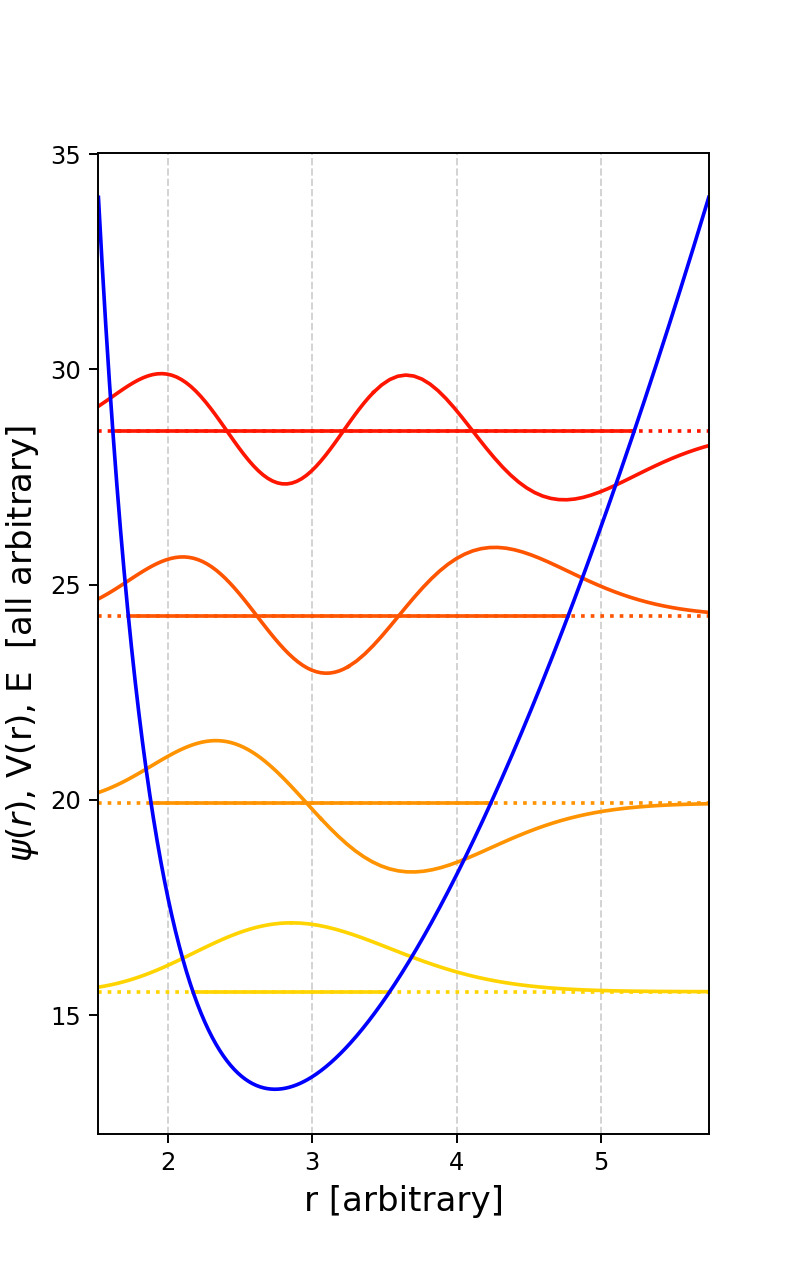

In [5]:
Scale = 4.5
plt.figure(figsize=(Scale, Scale*1.618))
for i, Ei in enumerate(EigenLine[:-1]):
    plt.axhline(Espectrum[i], color=colors[i], linestyle=':')
    plt.plot(*Ei, color=colors[i])
    
    
for i, Ei in enumerate(Espectrum[0:-1]):
    def pend(y, t):
        return np.array([y[1], -(Ei - V(t, *αβγλ))*y[0]])
    
    y0L =  1e-1, 1e-1
    y0R =  (-1)**i * 1e-1, (-1)**i * 1e-1
    
    rL, rR = EigenLine[i][0]
    rM = (rL + rR)/2
    tL = np.linspace(1e-1, rM, 101)
    tR = np.linspace(9, rM, 101)
    
    solL = odeint(pend, y0L, tL)
    solR = odeint(pend, y0R, tR)
    
    WL = solL[:, 0]/abs(solL[:, 0][-1])
    WR = solR[:, 0]/abs(solR[:, 0][-1])
    Wmax = max(max(abs(WL)), max(abs(WR)))
    
    plt.plot(tL, Ei + 1.6*WL/Wmax, color=colors[i])
    plt.plot(tR, Ei + 1.6*WR/Wmax, color=colors[i])
    
rs = np.linspace(*EigenLine[-1][0], 500)    
plt.plot(rs, V(rs, *αβγλ), color='blue')
plt.xlabel('r [arbitrary]', fontsize=14)
plt.ylabel('$\psi(r)$, V(r), E  [all arbitrary]', fontsize=14)
#plt.grid(color='lightgray')
plt.grid(axis='x', linestyle='--', color='lightgray')
#plt.grid(linestyle='--', color='lightgray')
plt.xlim(EigenLine[-1][0])
plt.show()